# Import library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
data  = pd.read_csv('../input/mall-customers/Mall_Customers.csv')

# Data Analysis

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


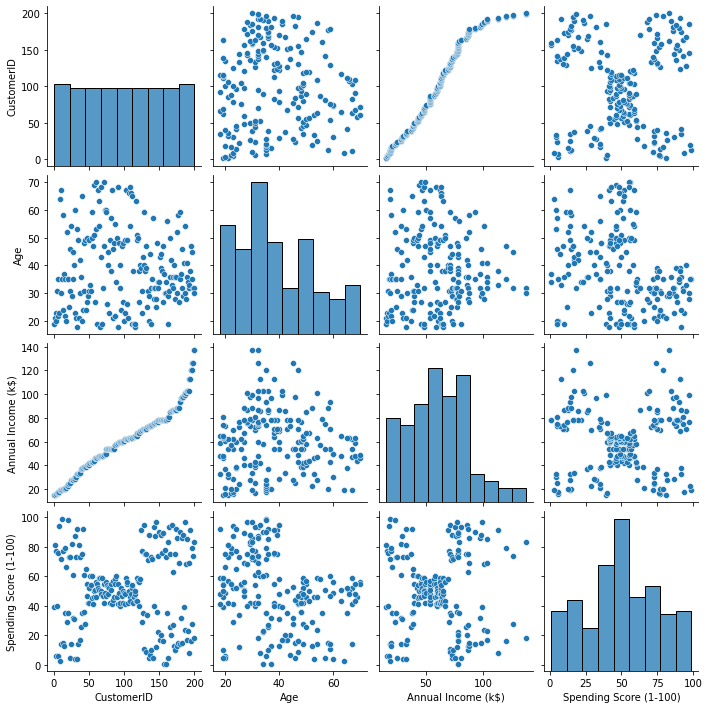

In [6]:
sns.pairplot(data)

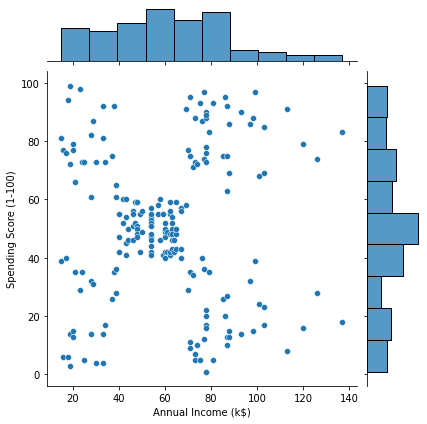

In [7]:
sns.jointplot(x =data['Annual Income (k$)'] , y =data['Spending Score (1-100)'])

In [8]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Preprocessing

In [9]:
X = data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# K_Means

### Choosing the number of cluster with WCSS

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
     K_means = KMeans(n_clusters = i , random_state = 42)
     K_means.fit(X)
     wcss.append(K_means.inertia_)


#### Plot Elbow

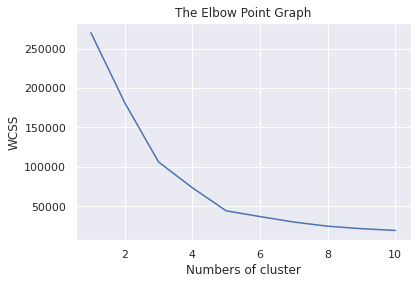

In [11]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Numbers of cluster')
plt.ylabel('WCSS')
plt.show()

### Training Our Model

In [12]:
Kmeans = KMeans(n_clusters = 5, init='k-means++', random_state= 4 )

y = Kmeans.fit_predict(X)
y

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

### Visualising the Clustering

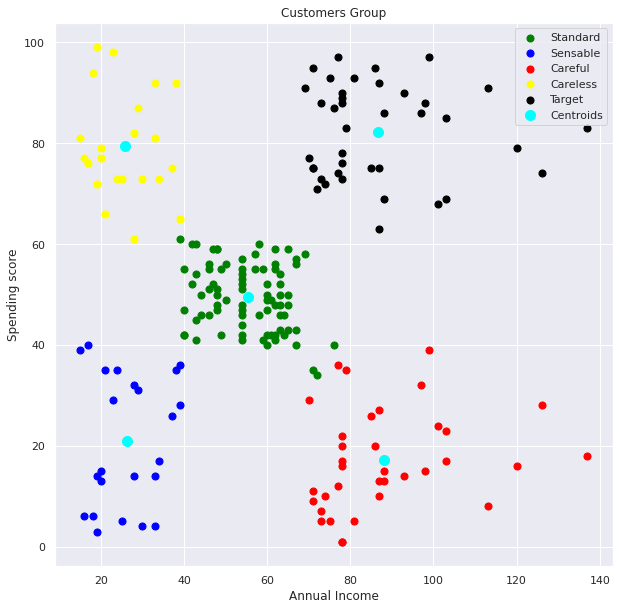

In [13]:
plt.figure(figsize = (10,10))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c = 'green', label='Standard')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c = 'blue', label='Sensable')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c = 'red', label='Careful')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c ='yellow', label='Careless')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c = 'black', label='Target')

plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1],
           s = 100,c = 'cyan', label = 'Centroids')
plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

# Hierarchical Clustering

### Choosing the number of cluster with Dendrogram

Text(0, 0.5, 'Euckidean distance')

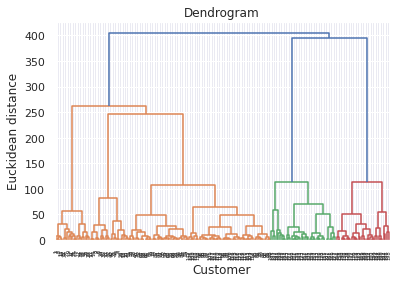

In [14]:
from scipy.cluster.hierarchy import dendrogram , linkage
dend = dendrogram(linkage(X , method= 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euckidean distance')

### Training Our Model

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5 , affinity= 'euclidean', linkage='ward')

y = hc.fit_predict(X)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Visualising the Clustering

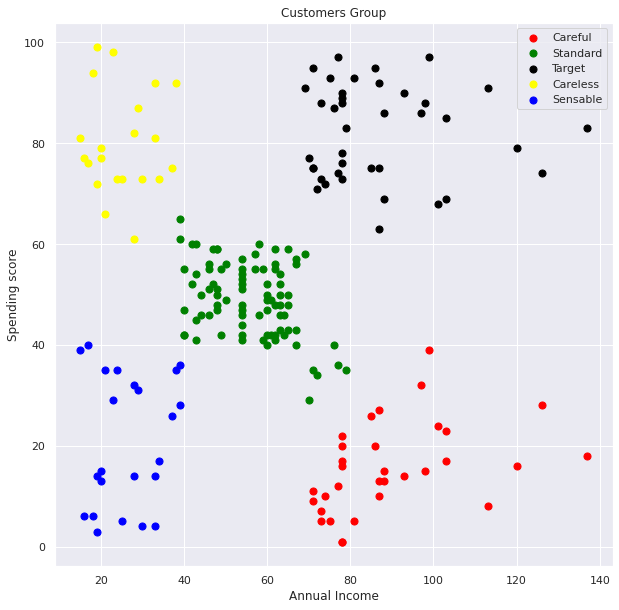

In [16]:
plt.figure(figsize = (10,10))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c = 'red', label='Careful')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c = 'green', label='Standard')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c = 'black', label='Target')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c = 'yellow', label='Careless')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c = 'blue', label='Sensable')
plt.title('Customers Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()